In [31]:
import pandas as pd
import numpy as np
from scipy.stats import kendalltau
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from IPython.core.display_functions import display
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


from sklearn.metrics import r2_score

In [32]:
df = pd.read_csv("encoded_df.csv")

In [33]:
display(df)

,total_sales_price,carat_weight,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,...,culet_size_L,culet_size_M,culet_size_N,culet_size_S,culet_size_SL,culet_size_VS,culet_size_unknown,culet_condition_Chipped,culet_condition_Pointed,culet_condition_unknown
0,200,0.09,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,200,0.09,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,200,0.09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,200,0.09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,200,0.09,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158626,1097128,15.06,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
158627,1132347,18.88,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
158628,1210692,10.65,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
158629,1292500,5.17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [34]:
X = df.drop('total_sales_price', axis=1)
y = df['total_sales_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with a specific number of estimators, e.g., 100
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
# You can adjust the number of trees in the forest (the n_estimators parameter) and other hyperparameters of the RandomForestRegressor to find the best model for your data. You may also want to use cross-validation or a grid search to find the optimal hyperparameters.

Mean Absolute Error: 2303.04
Mean Squared Error: 132617287.99
Root Mean Squared Error: 11515.96
R-squared: 0.79


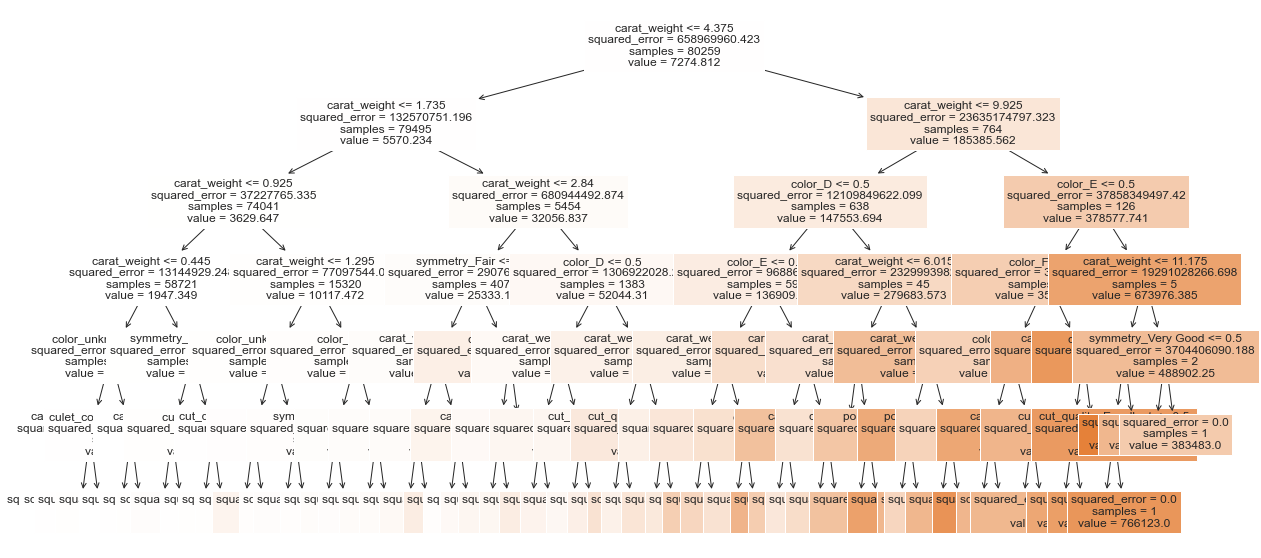

In [35]:

# Get the first tree from the Random Forest
first_tree = rf.estimators_[0]

# Set the figure size for the tree plot
plt.figure(figsize=(20, 10))

# Plot the first tree
plot_tree(first_tree, filled=True, feature_names=X.columns, fontsize=12)

# Show the plot
plt.show()

In [36]:
# Set a threshold to transform the continuous target variable into binary
threshold = np.median(y)

# Transform the continuous target variable into binary
y_binary = np.where(y >= threshold, 1, 0)

# Make binary predictions using the Random Forest model
y_pred_probs = rf.predict(X)
y_pred_binary = np.where(y_pred_probs >= threshold, 1, 0)

# Calculate the rank correlation between the true binary labels and the predicted probabilities
tau, _ = kendalltau(y_binary, y_pred_probs)

# Calculate Somers' D
somers_d = 2 * tau

print(f"Somers' D: {somers_d:.2f}")

Somers' D: 1.48


/Users/aaron/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
